In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=3
import random as rd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('kmeans.csv')
print(X)

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


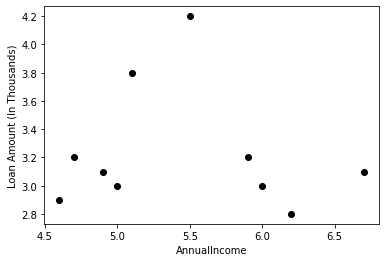

In [3]:
X = X[["X1","X2"]]
#Visualise data points
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [4]:
x1 = X['X1'].values
x2 = X['X2'].values

In [5]:
x1

array([5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6. ])

In [6]:
x2

array([3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ])

In [7]:
X = np.array(list(zip(x1, x2)))
print(X)

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]


In [8]:
C_x = [6.2, 6.6 ,6.5]
C_y = [3.2, 3.7, 3.0]

In [9]:
Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(Centroid.shape)

Initial Centroids
(3, 2)


In [10]:
Centroid

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]], dtype=float32)

In [11]:
type(Centroid)

numpy.ndarray

In [12]:
Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [13]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
[0,1,2,0,0,1,2,1,1,0]

[0, 1, 2, 0, 0, 1, 2, 1, 1, 0]

In [15]:
def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [16]:
error = euclidean(Centroid, Centroid_old,None)
print(error)

12.537144692236463


In [17]:
iterr = 0

In [18]:
while error != 0:
        # Assigning each value to its closest cluster
        iterr = iterr + 1
        for i in range(len(X)):
            #print("Data Points")
            #print(X[i])
            distances = euclidean(X[i], Centroid)
            #print("Distances")
            #print(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        Centroid_old = deepcopy(Centroid)
        print("Old Centroid")
        print(Centroid_old)
            
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            Centroid[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error  ... ",error)
        print("Data points belong to which cluster")
        print(clusters)
        print("********************************************************")

Old Centroid
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
 New Centroids after  1  Iteration 
 [[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
Error  ...  1.5886391
Data points belong to which cluster
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
********************************************************
Old Centroid
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
 New Centroids after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.5484787
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
Old Centroid
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
 New Centroids after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************


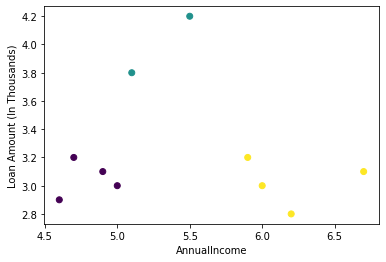

In [21]:
X = pd.read_csv('kmeans.csv')
X = X[["X1","X2"]]
#Visualise data points
plt.scatter(X["X1"],X["X2"],c=clusters)
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()